In [1]:
import os
import sys
import json
import pickle
import requests
import random
import pandas as pd
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from pprint import pprint
from datetime import datetime, timedelta
import time
from tqdm import tqdm

from bdp.data.crypto.coingecko.downloads import (
    get_df_timeserieses,
    metadataLists
)

from bdp.data.crypto.coingecko.utils import (
    get_current_and_past_timestamps,
)

from bdp.data.crypto.coingecko.coingecko_dataclasses import (
    PriceChangeData,
    prepare_dict_for_dataclasss,
    filter_dict_for_dataclass
)

from bdp.data.crypto.coingecko.metadata_postprocessing import price_change_data_to_dataframe
from bdp.data.crypto.coingecko.timeseries_postprocessing import preprocess_dataframe

from matplotlib import pyplot as plt

In [2]:
date_string = "2024-03-13"
metadata_lists:metadataLists = metadataLists(date_string=date_string) # all metadata objects from files
metadata_lists.list_into_dicts()
uniswap_metadata_df = price_change_data_to_dataframe(metadata_lists.uniswap_coins) # all pd time seriese
uniswap_time_series,missing_time_series = get_df_timeserieses(metadata_lists) # get time serieses df

100%|██████████| 1042/1042 [00:05<00:00, 180.05it/s]

Obtained 1042 timeserieses Missing 0


In [3]:
uniswap_metadata_df.columns

Index(['sentiment_votes_up_percentage', 'watchlist_portfolio_users',
       'market_cap_rank', 'price_change_percentage_24h',
       'price_change_percentage_7d', 'price_change_percentage_14d',
       'price_change_percentage_30d', 'price_change_percentage_60d',
       'price_change_percentage_200d', 'price_change_percentage_1y',
       'price_change_percentage_1h_in_currency',
       'price_change_percentage_24h_in_currency',
       'price_change_percentage_7d_in_currency',
       'price_change_percentage_14d_in_currency',
       'price_change_percentage_30d_in_currency',
       'price_change_percentage_60d_in_currency',
       'price_change_percentage_200d_in_currency',
       'price_change_percentage_1y_in_currency', 'current_price',
       'total_value_locked', 'mcap_to_tvl_ratio', 'market_cap', 'uniswap',
       'id', 'contract', 'name', 'symbol'],
      dtype='object')

In [4]:
uniswap_metadata_df[["market_cap_rank","current_price","market_cap","id","symbol"]].sort_values(by="market_cap",ascending=False).head()

,market_cap_rank,current_price,market_cap,id,symbol
68,6.0,4047.280000,3.991446e+10,staked-ether,steth
69,12.0,0.000032,1.910369e+10,shiba-inu,shib
132,13.0,4.520000,1.558096e+10,the-open-network,ton
70,16.0,1.250000,1.157421e+10,matic-network,matic
71,18.0,73041.000000,1.139798e+10,wrapped-bitcoin,wbtc


<Axes: >

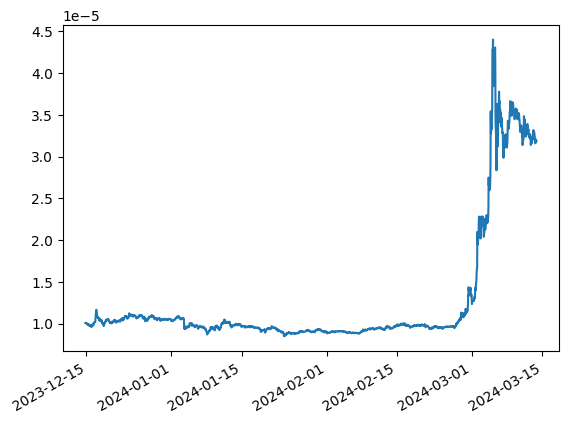

In [5]:
coin_id = "shiba-inu"
coin_metadata = metadata_lists.uniswap_coins[coin_id]
coin_df = uniswap_time_series[coin_id]
coin_df["prices"].plot()

In [6]:
tsmd  = preprocess_dataframe(coin_df,coin_metadata)
tsmd.ts.head()

c:\users\cesar\desktop\projects\birthdeathportafoliochoice\codes\birth-death-portfolio\src\bdp\data\crypto\coingecko\timeseries_postprocessing.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elapsed_time = time_series - time_series[0]


,prices,market_caps,total_volumes,elapsed_hours
2023-12-14 20:01:08.751,0.00001,5.918816e+09,2.622263e+08,0
2023-12-14 21:00:44.025,0.00001,5.913041e+09,2.527040e+08,1
2023-12-14 22:00:31.328,0.00001,5.964829e+09,2.526751e+08,2
2023-12-14 23:01:12.325,0.00001,5.953687e+09,2.481550e+08,4
2023-12-15 00:00:38.592,0.00001,5.930586e+09,2.484255e+08,4


<Axes: >

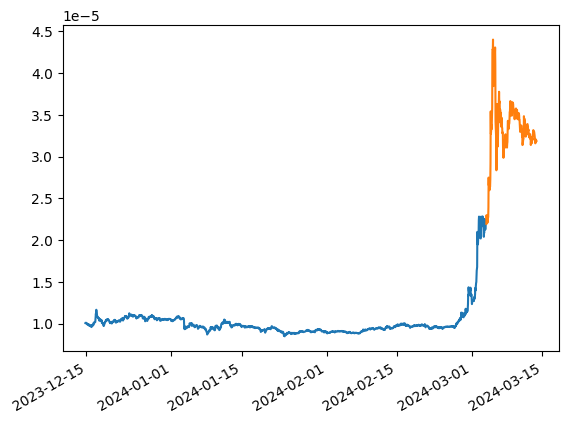

In [8]:
tsmd.past_body["prices"].plot()
tsmd.prediction_head["prices"].plot()